# LyMAS simulation 1 Gpc

### In this Python notebook you will find

3 . Data points from the file "fof_1000_1024_0.15.asc" that comes from 1Gpc box

    3.1 Position of all the points 
    3.2 Mass cut for the most massive points. Keeping the same M_cut = 3e12.
    3.3 Getting 10% of the mass cut gives 9606 points. 
    3.4 Plot to show the previous 10% relative to all the points
    3.5 Random 20 sightlines in the 1Gpc box
    3.6 Calculation of Gamma_i for the sightlines generated in 3.4
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



# 2. Positions from LyMAS data 1 Gpc

In this section I read the data generated by the LyMAS simulation and calculate $\Gamma$ for the new distribution of points.


In [2]:
#Reading the file to obtain the Mass, Position x, y, z and Velocities vx, vy, vz. All in comoving coordinates
file_data = pd.read_csv('fof/fof_1000_1024_0.15.asc', delim_whitespace = True, names = [
                 'Mass',
                  'x'  ,
                  'y'  ,
                  'z'  ,
                  'vx' ,
                  'vy' ,
                  'vz'])
file_data

Mass           x           y           z          vx  \
0       1.406000e+12  600.522400  580.929626  205.539291  180.347610   
1       1.406000e+12  336.291382  599.522949  951.475830  294.983887   
2       1.406000e+12  682.558472  900.720276  346.613312   44.373226   
3       1.406000e+12  631.961121  379.004303  542.327820  216.736465   
4       1.406000e+12  979.231262  782.551453  812.389465   37.081947   
5       1.406000e+12  666.417114   94.162216  853.731750   28.266968   
6       1.406000e+12  237.954849  552.277100  127.855209   -7.618912   
7       1.406000e+12  569.661621   57.891335  143.550018  547.059204   
8       1.406000e+12  746.699341   65.781006  215.617096   48.435463   
9       1.406000e+12  412.778015  463.919708  890.273987  184.900879   
10      1.406000e+12  903.133606   56.775627  897.043091  -44.109478   
11      1.406000e+12  581.942749  468.938934  832.001221    9.530290   
12      1.406000e+12  589.632141  232.479111  789.610046 -105.865715   
13      1.406000e+12  779.269714  630.464233  271.632294  -83.043777   
14      1.406000e+12  652.082886  466.869324  980.069214 -196.060257   
15      1.406000e+12  684.253540  466.980377  434.135742  102.984505   
16      1.406000e+12  164.943817  754.871826  149.032379   88.171387   
17      1.406000e+12   23.439577  236.886856  935.372498  139.702835   
18      1.406000e+12  876.222595  433.661560  386.634064   13.184188   
19      1.406000e+12  826.201294   76.838394  348.180054  201.464493   
20      1.406000e+12  967.708801  275.678497  857.426025   98.817604   
21      1.406000e+12  379.844940  492.712128  325.333435  206.758820   
22      1.406000e+12  690.932739  170.547623  547.583923  404.756958   
23      1.406000e+12   67.584702    1.957425  765.878845  -74.342331   
24      1.406000e+12  863.731384  528.828857  902.670288  302.388550   
25      1.406000e+12  971.743896  345.545227  658.692505  182.638718   
26      1.406000e+12  381.603485  663.101685  712.184387  261.879181   
27      1.406000e+12  247.792892  500.857513  328.191223 -380.401062   
28      1.406000e+12   23.727335  729.763306  240.034729    2.669499   
29      1.406000e+12  621.757263  922.930908  239.574951   -1.359183   
...              ...         ...         ...         ...         ...   
343928  4.528000e+13  801.912292  507.464539  528.688843  225.083069   
343929  4.605000e+13  554.545776  150.004684   14.429940  116.937386   
343930  4.676000e+13  586.091797  331.359192  755.753479 -339.511169   
343931  4.697000e+13  804.227722  286.325806  200.239044  341.771362   
343932  4.725000e+13  301.517151  681.522949  968.704590  355.553192   
343933  4.732000e+13  722.874939  706.107971  370.846100   59.436417   
343934  4.816000e+13  153.415573  301.754242  697.915222  -94.703842   
343935  4.830000e+13  765.082764  823.908203  229.655167  125.923035   
343936  4.999000e+13  132.556305  512.158630  249.684708   -3.904206   
343937  5.034000e+13  978.891968   93.165764  139.916595  -41.767151   
343938  5.210000e+13  605.636780  743.203186  709.210205 -200.361938   
343939  5.280000e+13  411.547119  219.084488  989.460876  282.191498   
343940  5.294000e+13  510.940643  742.324646  758.167419  143.194962   
343941  5.294000e+13   94.058563  481.186768  156.951340  323.908386   
343942  5.407000e+13  154.506516  865.454590  644.569092 -111.426636   
343943  5.512000e+13  212.008606  725.020874  394.812164 -185.543304   
343944  5.533000e+13  823.245239  488.889435  948.007080 -107.304932   
343945  5.744000e+13  687.156372  448.114868  814.101440   81.054214   
343946  5.843000e+13  627.383057  292.278259  740.085022   14.208570   
343947  5.878000e+13  971.058838  190.451889   44.508186   56.406391   
343948  5.885000e+13  679.158264  169.362808  238.864258 -246.049835   
343949  6.061000e+13  723.087891  702.521179  369.622467  120.482552   
343950  6.208000e+13  590.786621  846.902283  709.806641  -57.409168   
343951  6.265000e+13  129.790237  595.572510  712.219055

In [3]:
#Getting only the values for X, Y, Z
Xc = file_data['x'].values
Yc = file_data['y'].values
Zc = file_data['z'].values
#print values
print('X:',Xc)
print('y:',Yc)
print('Z:',Zc)
print(type(Xc))
print(len(Xc))

X: [ 600.5224    336.291382  682.558472 ...,  854.602966  346.648132
  830.396362]
y: [ 580.929626  599.522949  900.720276 ...,  746.394226  782.327637
  426.167847]
Z: [ 205.539291  951.47583   346.613312 ...,  390.208496   87.323555
  718.331116]
<class 'numpy.ndarray'>
343958


(0, 1000)

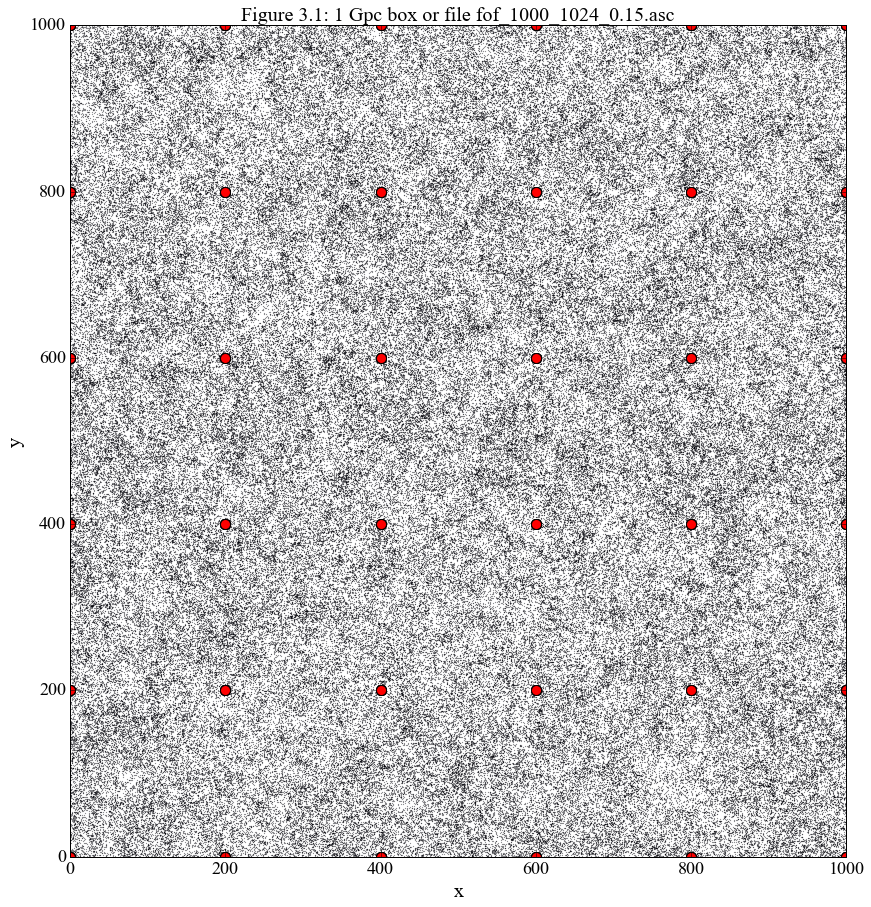

In [21]:
figure = plt.figure(figsize=(14,14))
plt.scatter(Xc,Yc, marker = 'o', s = 0.03)
g_x = np.arange(0.00,1.01,0.20)*1000
g_y = np.arange(0.00,1.01,0.20)*1000
g_z = np.arange(0.00,1.01,0.20)*1000
for x in g_x:
    for y in g_y:
        for z in g_z:
            plt.plot(x,y, marker = 'o', markersize = 10, color = 'red')
plt.title('Figure 3.1: 1 Gpc box or file fof_1000_1024_0.15.asc')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1000)
plt.ylim(0,1000)
#plt.savefig('slice_lymas.pdf')

## Getting the points that we will consider as quasars using a mass cut

We want to account for the galaxies/points that have a masses higher than 10^12
M_cut = 1e12. From those massive haloes targeted with M_cut we will consider 10% to be a quasars

In [5]:
#Loading the mass values
mass_gal = file_data['Mass'].values
mass_gal
len(mass_gal)

343958

Doing a mass cut M$_{cut} = 3\times 10^{12}$

In [6]:
mass_cut = mass_gal>=3e12
mass_cut

massive_haloes = mass_gal[mass_cut]
len(mass_gal[mass_cut])
print(massive_haloes)

[  3.02300000e+12   3.02300000e+12   3.02300000e+12 ...,   7.01700000e+13
   7.74800000e+13   7.95900000e+13]


## Choosing randomly 10% of the points. For which I create a boolean mask
The boolean mask is generated by a binomial distribution. It gives back approximately 10% of random points

In [7]:
np.random.seed(1234)
mask_10perc = np.random.binomial(1,0.1,len(mass_gal[mass_cut])).astype('bool')
print(mask_10perc)
print(mask_10perc.sum())
#massive_haloes[mask_10perc]

[False False False ..., False False False]
9606


In [8]:
Xc_mc =  Xc[mass_cut][mask_10perc]
Yc_mc =  Yc[mass_cut][mask_10perc]
Zc_mc =  Zc[mass_cut][mask_10perc]

print(Xc_mc)

[ 799.990784  275.565704  456.294342 ...,  411.547119   94.058563
  117.292763]


In [9]:
#Xc_mc
#Yc_mc
#Zc_mc
print(len(Xc_mc), len(Yc_mc), len(Zc_mc))

9606 9606 9606


(0, 1000)

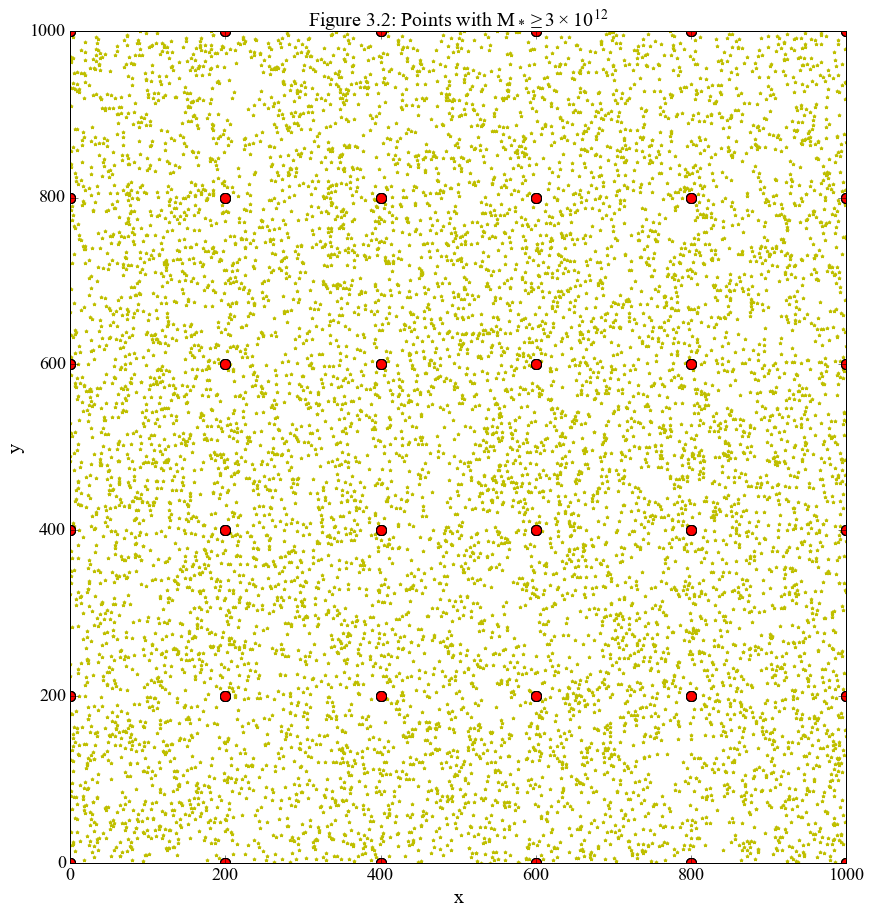

In [23]:
figure = plt.figure(figsize=(14,14))
plt.scatter(Xc_mc,Yc_mc, marker = '*', s = 10, color = "y")
g_x = np.arange(0.00,1.01,0.20)*1000
g_y = np.arange(0.00,1.01,0.20)*1000
g_z = np.arange(0.00,1.01,0.20)*1000
for x in g_x:
    for y in g_y:
        for z in g_z:
            plt.plot(x,y, marker = 'o', markersize = 10, color = 'red')
plt.title('Figure 3.2: Points with M$_* \geq 3 \\times 10^{12}$')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1000)
plt.ylim(0,1000)

## Plotting these 10% relative to all the points in the file "fof_0.15_agn.asc"

(0, 1000)

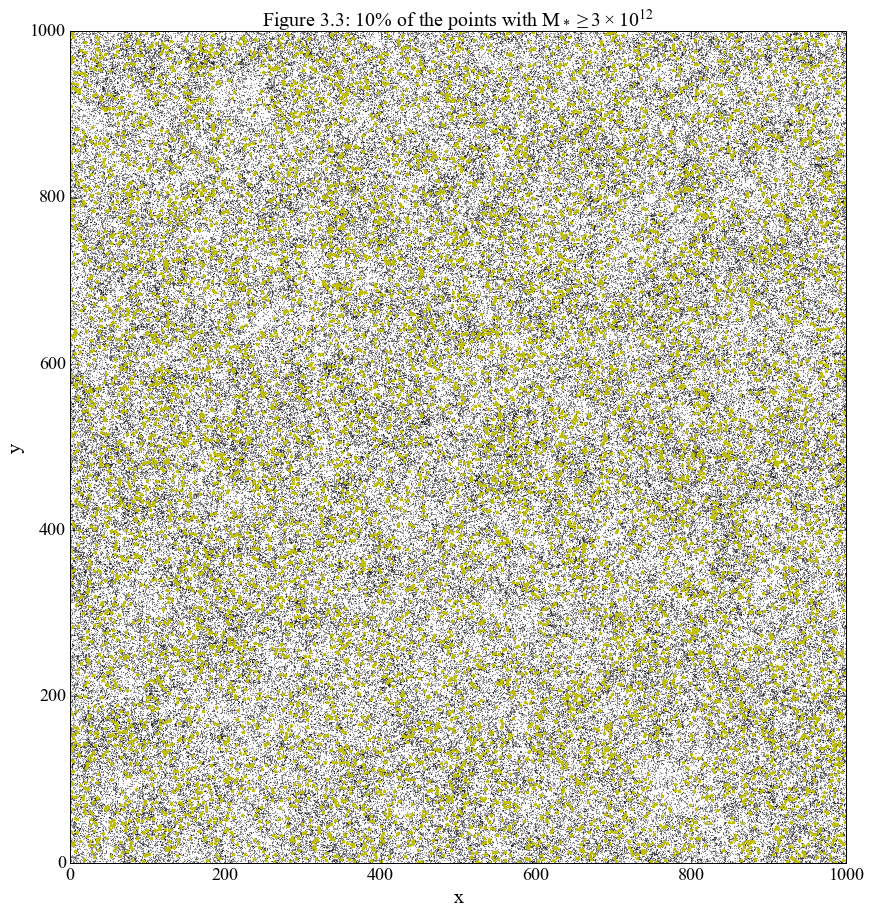

In [11]:
figure = plt.figure(figsize=(14,14))
plt.scatter(Xc,Yc, marker = 'o', s = 0.025)
plt.scatter(Xc_mc,Yc_mc, marker = '*', s = 10, color = 'y')
plt.title('Figure 3.3: 10% of the points with M$_* \geq 3 \\times 10^{12}$')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1000)
plt.ylim(0,1000)

# $\Gamma$ for this subset of points - the LyMAS simulation


In [12]:

#Grid
g_x = np.arange(0.00,1.01,0.20)*1000
g_y = np.arange(0.00,1.01,0.20)*1000
g_z = np.arange(0.00,1.01,0.20)*1000
print(g_x.size*g_y.size*g_z.size)


216


In [13]:
box_size = 1000 #Mpc/h
Lum = 1.0   #Test value
lamb0 = 1.5* box_size #In units of the box size
coeff = Lum/(4*np.pi)

In [14]:
gamma_a = []
mean_dist = []


for x in g_x:
    for y in g_y:
        for z in g_z:
            # Periodic boundary contitions for the points near the edges.
            # Make the dx, dy and dz and create mask (m_*) for periodic
            # boundary conditions. Then, replace those points further away
            # by the their periodic analogue.
            dx, dy, dz = Xc_mc-x, Yc_mc-y, Zc_mc-z
            m_x = np.abs(dx) > 0.5 * box_size
            dx[m_x] = box_size - np.abs(dx[m_x])
            
            # Same for y
            m_y = np.abs(dy) > 0.5 * box_size
            dy[m_y] = box_size - np.abs(dy[m_y])
            
            #Same for z
            m_z = np.abs(dz) > 0.5 * box_size
            dz[m_z] = box_size - np.abs(dz[m_z])
            #### end of the periodic boundary conditions
            
            # the distance array
            dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)
            #print(dist)
            dist_mask = np.abs(dist) <= 0.5 * box_size
            dist = dist[dist_mask]
            #Calculating the phothoionisation rate
            Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
            gamma_a.append(Gamma)
            mean_dist.append(dist.mean())
            

gamma_a = np.array(gamma_a)

print("Gamma_min:",gamma_a.min(),'Gamma_max',gamma_a.max())

Gamma_min: 0.00339889126142 Gamma_max 0.00836958469083


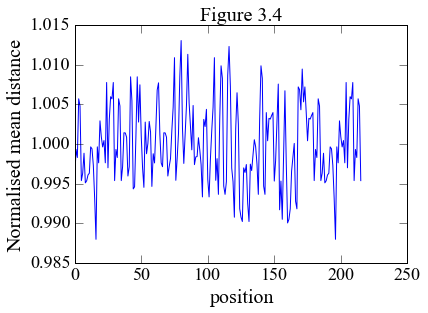

In [15]:
#Some fluctuations in the distance module
#print(gamma_a)

plt.plot(mean_dist/np.nanmean(np.array(mean_dist)))
plt.ylabel('Normalised mean distance')
plt.xlabel('position')
plt.title('Figure 3.4')

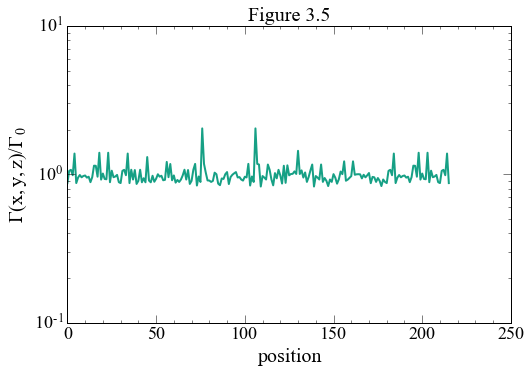

In [16]:
fig = plt.figure(1,figsize = (8,5))
plt.minorticks_on()
plt.plot(np.arange(gamma_a.size),gamma_a/gamma_a.mean(), linewidth=2.0, color='#16a085')
plt.yscale('log')
plt.ylabel('$\Gamma(x,y,z)/\Gamma_0$')
plt.xlabel('position')
#for i in np.arange(16):
# plt.axvline(x=i*4,ls='--',color='r')
plt.title('Figure 3.5')
#plt.xlim(0,216)

## Random sightlines 

(0, 1000)

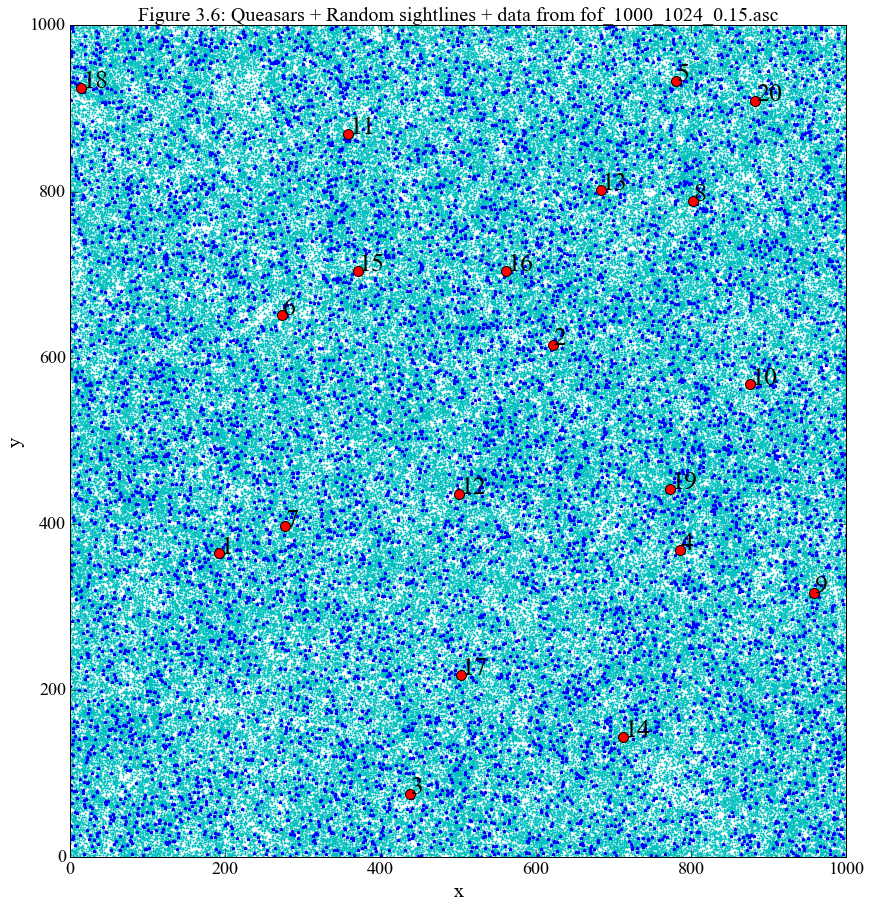

In [17]:
np.random.seed(1234)
figure = plt.figure(figsize=(14,14))
plt.scatter(Xc,Yc, marker = 'o', s = 0.50,color='c')
num_sightlines = 20
g_x = np.random.uniform(0.0, 1.0, num_sightlines )*1000.
g_y = np.random.uniform(0.0, 1.0, num_sightlines )*1000.
#g_z = np.random.uniform(0.0, 1.0, num_sightlines )*1000.
g_z = np.linspace(0,1000,num_sightlines)

plt.scatter(Xc_mc,Yc_mc, marker = '*', s = 10, color = 'blue')

i=0
for x,y in zip(g_x,g_y):
    plt.plot(x,y, marker = 'o', markersize = 10, color = 'red')
    plt.text(x+1,y+1,str(i+1),fontsize=26,color='black')
    i+=1
plt.title('Figure 3.6: Queasars + Random sightlines + data from fof_1000_1024_0.15.asc')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1000)
plt.ylim(0,1000)
#plt.savefig('slice_lymas.pdf')

Note: Blue star-points are the quasars, red circles correspond to the random sightlines and the cyan dots are the data from the file "fof_1000_1024_0.15.asc".
The numbers next to the red circles match the subscript $i$ in the plots of $\Gamma(x,y)_i$ below.

## UV fluctuations for several sightlines as a function of the spectral direction, i.e. as a function of z.

First I calculate the Gamma mean of the total box 

In [18]:
box_size = 1000 #Mpc/h
Lum = 1.0   #Test value
lamb0 = 1.5* box_size #In units of the box size
coeff = Lum/(4*np.pi)


gamma_a = []
mean_dist = []

for x,y,z in zip(g_x,g_y, g_z):
            # Periodic boundary contitions for the points near the edges.
            # Make the dx, dy and dz and create mask (m_*) for periodic
            # boundary conditions. Then, replace those points further away
            # by the their periodic analogue.
            dx, dy, dz = Xc_mc-x, Yc_mc-y, Zc_mc-z
            m_x = np.abs(dx) > 0.5 * box_size
            dx[m_x] = box_size - np.abs(dx[m_x])
            
            # Same for y
            m_y = np.abs(dy) > 0.5 * box_size
            dy[m_y] = box_size - np.abs(dy[m_y])
            
            #Same for z
            m_z = np.abs(dz) > 0.5 * box_size
            dz[m_z] = box_size - np.abs(dz[m_z])
            #### end of the periodic boundary conditions
            
            # the distance array
            dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)
            #print(dist)
            dist_mask = np.abs(dist) <= 0.5 * box_size
            dist = dist[dist_mask]
            #Calculating the phothoionisation rate
            Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
            gamma_a.append(Gamma)
            mean_dist.append(dist.mean())
gamma_a = np.array(gamma_a)
gamma_mean = gamma_a.mean()

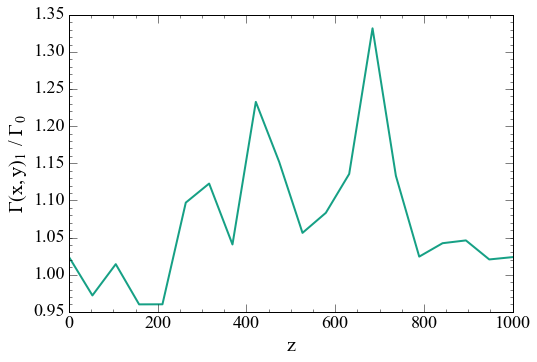

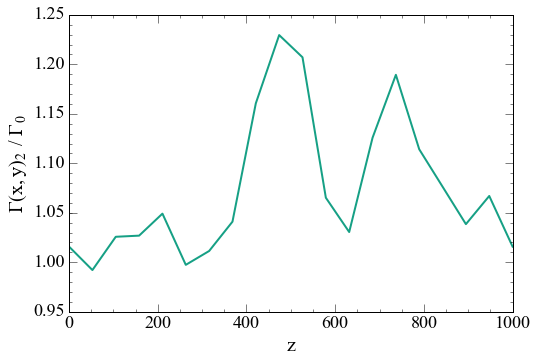

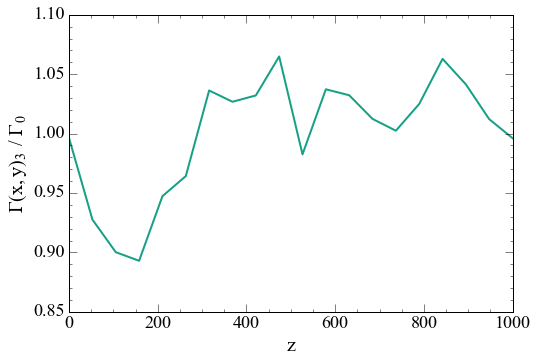

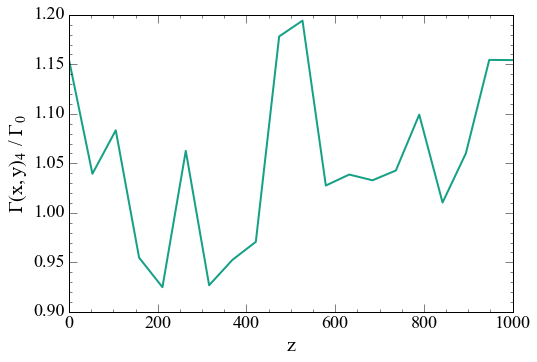

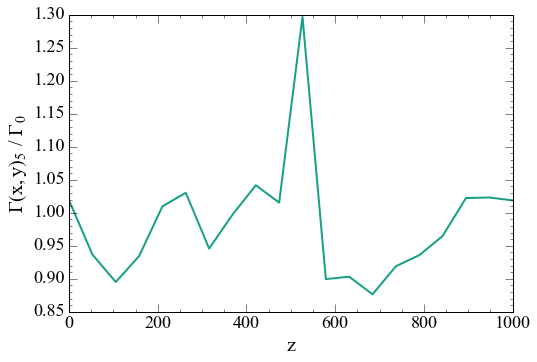

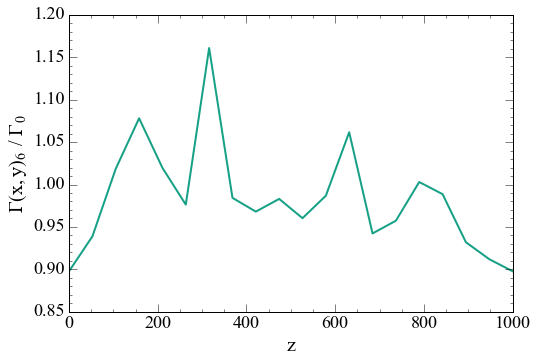

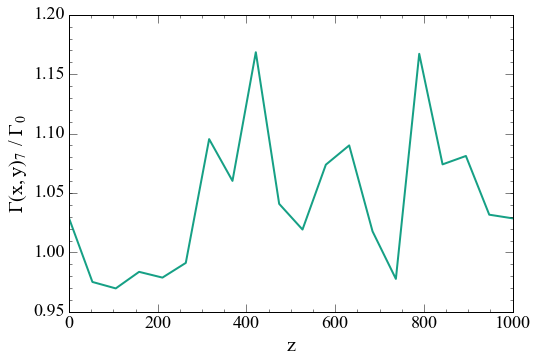

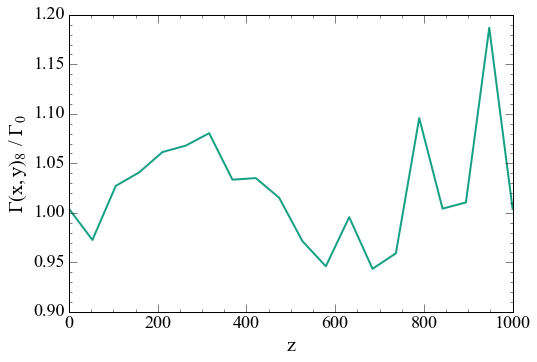

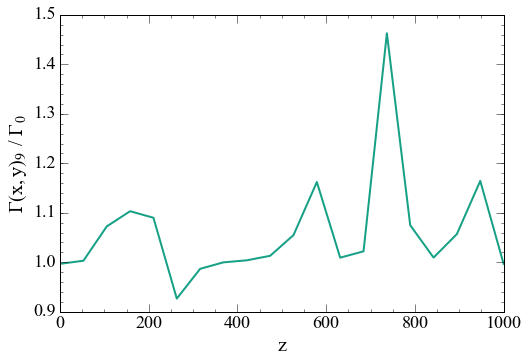

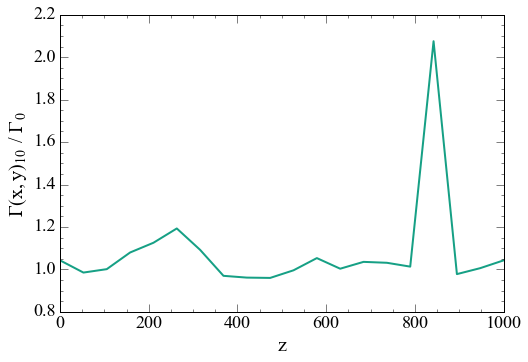

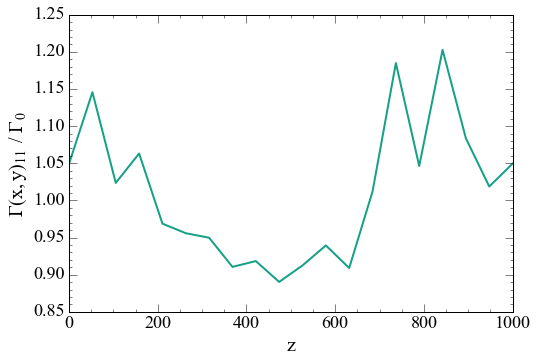

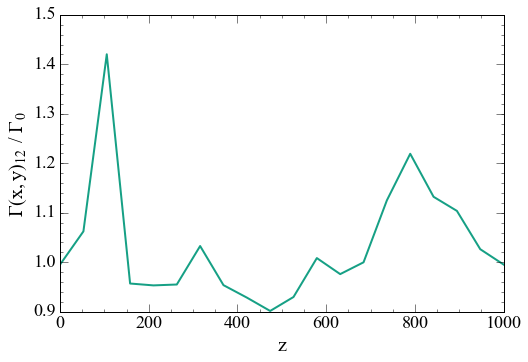

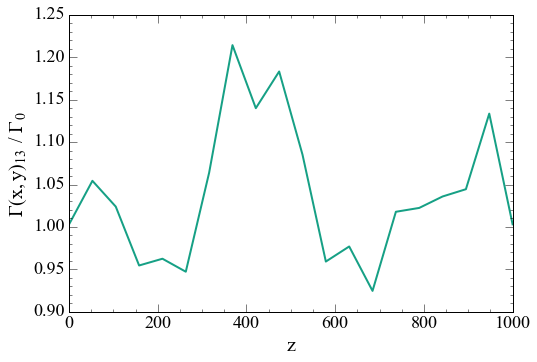

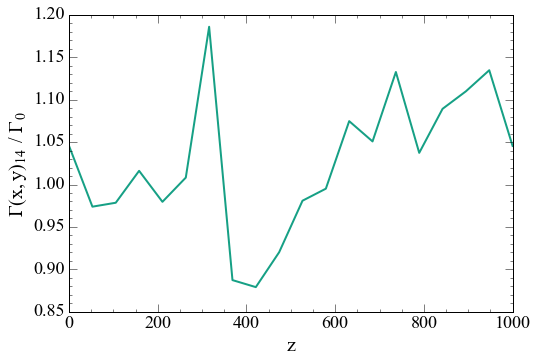

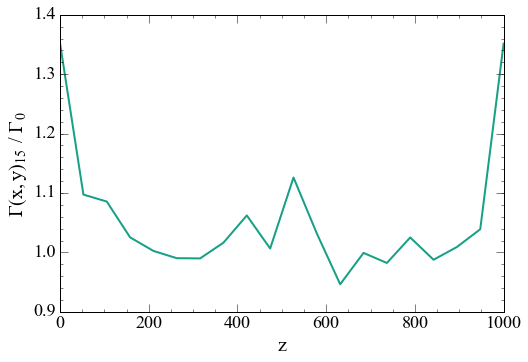

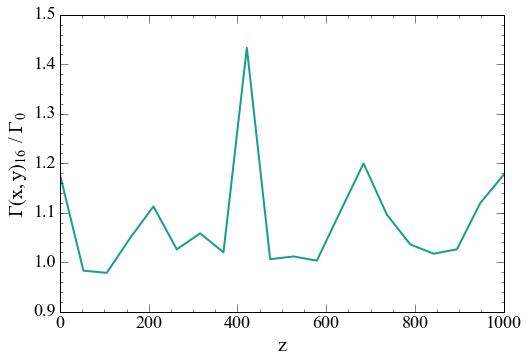

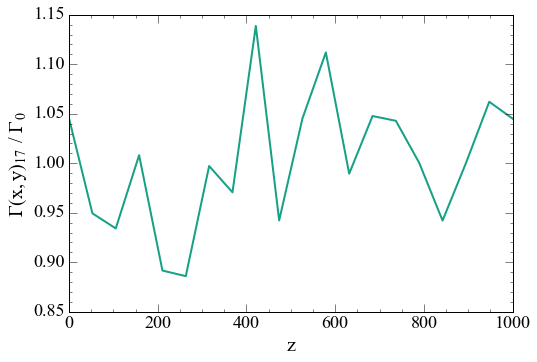

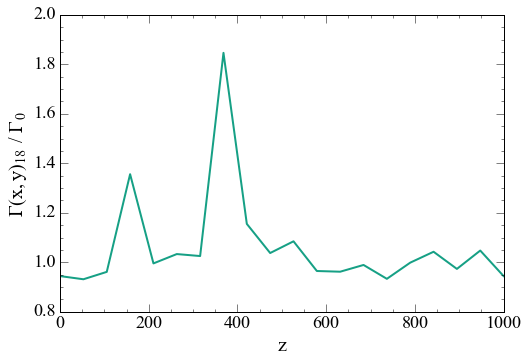

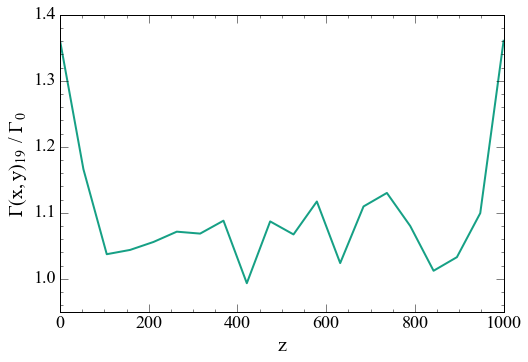

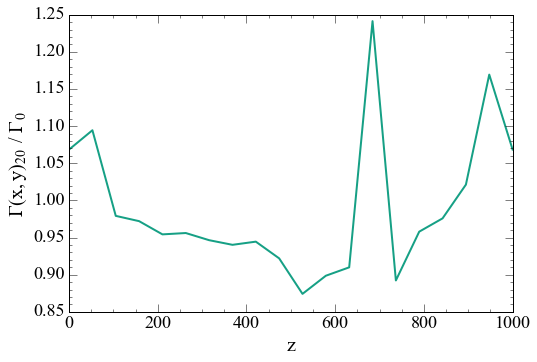

In [19]:
i=1
for x,y in zip(g_x,g_y):   
        gamma_a = []
        mean_dist = []
        for z in g_z:
                # Periodic boundary contitions for the points near the edges.
                # Make the dx, dy and dz and create mask (m_*) for periodic
                # boundary conditions. Then, replace those points further away
                # by the their periodic analogue.
                dx, dy, dz = Xc_mc-x, Yc_mc-y, Zc_mc-z
                m_x = np.abs(dx) > 0.5 * box_size
                dx[m_x] = box_size - np.abs(dx[m_x])

                # Same for y
                m_y = np.abs(dy) > 0.5 * box_size
                dy[m_y] = box_size - np.abs(dy[m_y])

                #Same for z
                m_z = np.abs(dz) > 0.5 * box_size
                dz[m_z] = box_size - np.abs(dz[m_z])
                #### end of the periodic boundary conditions

                # the distance array
                dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)
                #print(dist)
                dist_mask = np.abs(dist) <= 0.5 * box_size
                dist = dist[dist_mask]
                #Calculating the phothoionisation rate
                Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
                gamma_a.append(Gamma)
                mean_dist.append(dist.mean())

        gamma_a = np.array(gamma_a)
        fig = plt.figure(1,figsize = (8,5))
        plt.minorticks_on()
        #plt.scatter(Zc[np.arange(gamma_a.size)],gamma_a/gamma_a.mean(), linewidth=2.0, color='red')
        plt.plot(g_z,gamma_a/gamma_mean, linewidth=2.0, color='#16a085')
        #plt.yscale('log')
        filename = r"$\Gamma(x,y)_{" + str(i) + "}$"+r" / $\Gamma_0$"
        plt.ylabel(filename)
        plt.xlabel('z')
        plt.show()
        i+=1




Going to the 1 Gpc box shows a more homogeneous distribution of the points we consider as quasars. This should have an effect on Gamma, showing smaller variations. 